Nama : Muhammad Gymnastiar Mursyid<br>
NIM : 24.66.1011 <BR>
Prodi : Informatika(Student Exchange)<br>
Mata Kuliah : BDDM

In [34]:
!pip install tensorflow==2.18

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [36]:
# Step 1: Load and Preprocess Data
file_path = '/content/monroe county car crach 2003-2015.csv'
data = pd.read_csv(file_path, encoding='latin1')
data

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625
...,...,...,...,...,...,...,...,...,...,...,...
53938,2003,10,6,Weekday,1700.0,2-Car,No injury/unknown,IMPROPER LANE USAGE,DUNN & WHITE LOT WEST,0.000000,0.000000
53939,2003,11,3,Weekday,800.0,1-Car,No injury/unknown,UNSAFE SPEED,RED OAK & SR446,0.000000,0.000000
53940,2003,12,5,Weekday,1200.0,2-Car,No injury/unknown,BRAKE FAILURE OR DEFECTIVE,2ND ST & WALNUT,0.000000,0.000000
53941,2003,12,1,Weekend,700.0,2-Car,No injury/unknown,UNSAFE BACKING,NINETH & NORTH,0.000000,0.000000


# Prepocessing Data

In [37]:
# Cek missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1121
Reported_Location      35
Latitude               30
Longitude              30
dtype: int64


In [38]:
# Hapus baris dengan missing values dan simpan hasilnya
data = data.dropna().reset_index(drop=True)

In [39]:
# Cek kembali apakah missing values sudah dihapus
print("Jumlah missing values pada dataset setelah pembersihan:")
print(data.isnull().sum())

Jumlah missing values pada dataset setelah pembersihan:
Year                 0
Month                0
Day                  0
Weekend?             0
Hour                 0
Collision Type       0
Injury Type          0
Primary Factor       0
Reported_Location    0
Latitude             0
Longitude            0
dtype: int64


In [40]:
# Tampilkan jumlah data setelah pembersihan
print(f"Jumlah baris setelah pembersihan: {len(data)}")

Jumlah baris setelah pembersihan: 52582


In [41]:
data

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625
...,...,...,...,...,...,...,...,...,...,...,...
52577,2003,10,6,Weekday,1700.0,2-Car,No injury/unknown,IMPROPER LANE USAGE,DUNN & WHITE LOT WEST,0.000000,0.000000
52578,2003,11,3,Weekday,800.0,1-Car,No injury/unknown,UNSAFE SPEED,RED OAK & SR446,0.000000,0.000000
52579,2003,12,5,Weekday,1200.0,2-Car,No injury/unknown,BRAKE FAILURE OR DEFECTIVE,2ND ST & WALNUT,0.000000,0.000000
52580,2003,12,1,Weekend,700.0,2-Car,No injury/unknown,UNSAFE BACKING,NINETH & NORTH,0.000000,0.000000


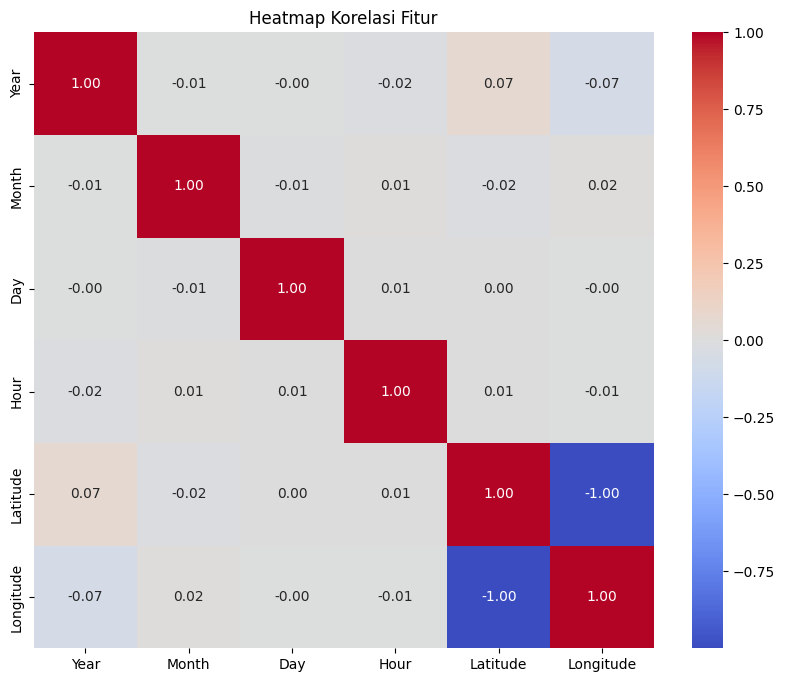

In [42]:
import seaborn as sns

# Pilih hanya kolom numerik
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Hitung matriks korelasi
correlation_matrix = numerical_data.corr()

# Visualisasi Heatmap Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur")
plt.show()

In [43]:
# Seleksi fitur berbasis domain knowledge:
# Menggunakan fitur temporal ('Year', 'Month', 'Day') karena relevan untuk analisis deret waktu.
data['Waktu'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

# Mengelompokkan data berdasarkan bulan untuk menghasilkan jumlah kecelakaan bulanan.
monthly_data = data.groupby(data['Waktu'].dt.to_period('M')).size().reset_index(name='Jumlah_Kecelakaan')
monthly_data['Waktu'] = monthly_data['Waktu'].dt.to_timestamp()

In [44]:
# Gabungkan data berdasarkan bulan
data['Waktu'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
monthly_data = data.groupby(data['Waktu'].dt.to_period('M')).size().reset_index(name='Jumlah_Kecelakaan')
monthly_data['Waktu'] = monthly_data['Waktu'].dt.to_timestamp()

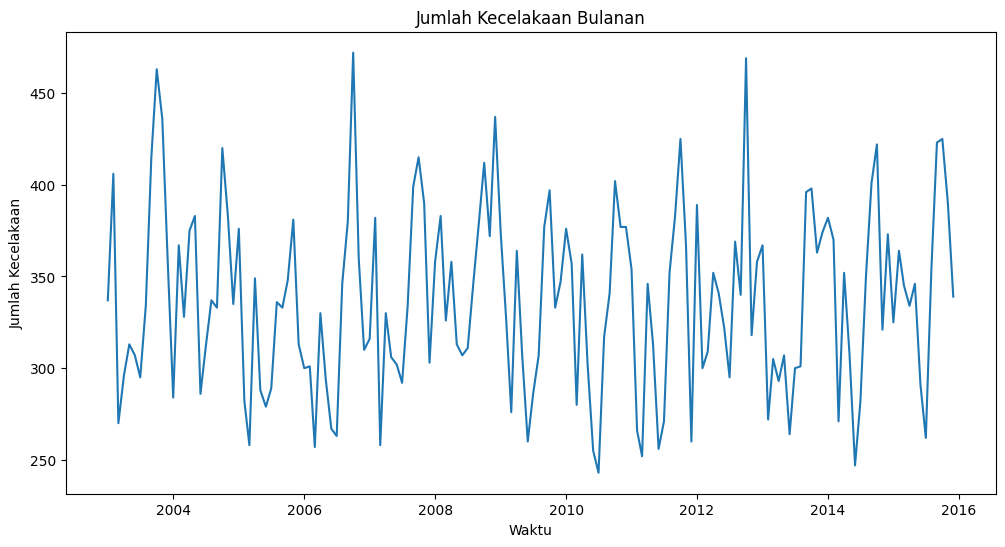

In [45]:
# Plot data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Waktu'], monthly_data['Jumlah_Kecelakaan'])
plt.title('Jumlah Kecelakaan Bulanan')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Kecelakaan')
plt.show()

In [46]:
# Normalisasi data
scaler = MinMaxScaler()
monthly_data['Jumlah_Kecelakaan_Dinormalisasi'] = scaler.fit_transform(monthly_data[['Jumlah_Kecelakaan']])

In [47]:
# Menambahkan fitur lag berdasarkan domain knowledge:
# 'Lag_1' merepresentasikan jumlah kecelakaan bulan sebelumnya, penting untuk analisis temporal.
monthly_data['Lag_1'] = monthly_data['Jumlah_Kecelakaan_Dinormalisasi'].shift(1)

# Menghapus baris dengan nilai NaN akibat penambahan fitur lag.
monthly_data.dropna(inplace=True)

# Modeling LSTM

In [48]:
# Membuat data sekuensial untuk LSTM
sequence_length = 12
X, y = [], []
data_values = monthly_data['Jumlah_Kecelakaan_Dinormalisasi'].values
for i in range(len(data_values) - sequence_length):
    X.append(data_values[i:i + sequence_length])
    y.append(data_values[i + sequence_length])
X, y = np.array(X), np.array(y)

In [49]:
# Membagi data menjadi training dan testing
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [50]:
# Reshape untuk LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [51]:
#Bangun dan Latih Model LSTM
model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
#Latih model yang dioptimalkan
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 156ms/step - loss: 0.1718 - val_loss: 0.1782
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1276 - val_loss: 0.0842
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0528 - val_loss: 0.0472
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0479 - val_loss: 0.0541
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0494 - val_loss: 0.0570
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0451 - val_loss: 0.0504
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0437 - val_loss: 0.0475
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0455 - val_loss: 0.0464
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0460 - val_loss: 0.0504
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0450 - val_loss: 0.0485
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0381 - val_loss: 0.0468
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0490 - val_loss: 0.0505

# Model Evaluasi

In [53]:
# Evaluasi Kinerja Model
# Prediksi pada data uji
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


In [54]:
# Metrik evaluasi
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)

In [55]:
print(f"RMSE: {rmse}")
print(f"MAPE: {mape * 100:.2f}%")

RMSE: 37.185690776552384
MAPE: 9.36%


In [56]:
#Memprediksi Nilai Masa Depan
future_months = 32  # Jumlah bulan ke depan yang ingin diprediksi
last_sequence = data_values[-sequence_length:].tolist()  # Ambil sekuens terakhir dari data
future_predictions = []

In [57]:
for _ in range(future_months):
    input_sequence = np.array(last_sequence[-sequence_length:]).reshape(1, sequence_length, 1)
    next_prediction = model.predict(input_sequence, verbose=0)[0, 0]
    future_predictions.append(next_prediction)
    last_sequence.append(next_prediction)

In [58]:
# Konversi prediksi ke skala aslinya
future_predictions_rescaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [59]:
#Hasilkan Tanggal Mendatang dan Visualisasikan
last_date = monthly_data['Waktu'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(), periods=future_months, freq='MS')

In [60]:
# Buat DataFrame untuk hasil prediksi
future_data = pd.DataFrame({
    'Waktu': future_dates,
    'Prediksi_Jumlah_Kecelakaan': future_predictions_rescaled.flatten()
})

# VISUALISASI PREDIKSI

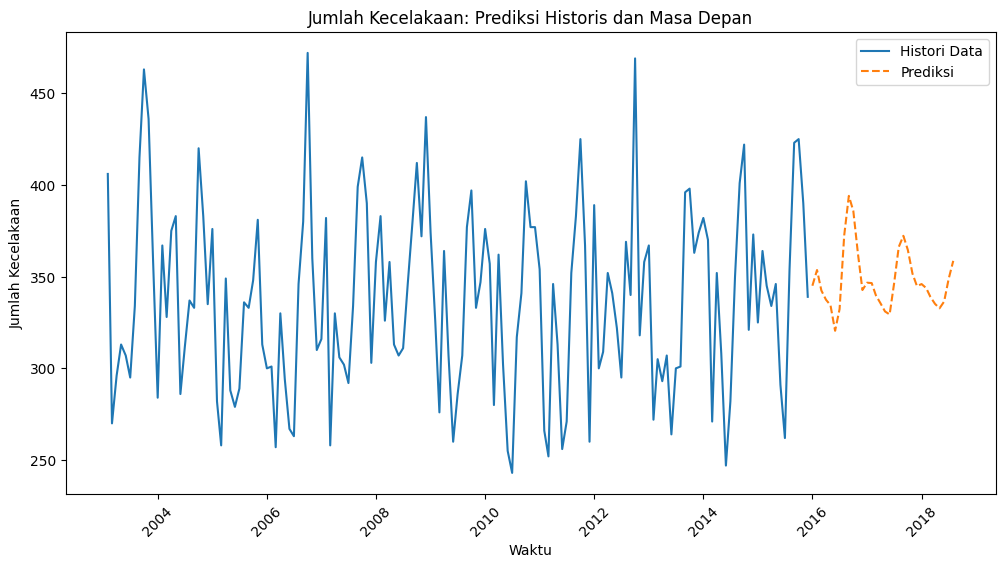

        Waktu  Prediksi_Jumlah_Kecelakaan
0  2016-01-01                  345.049133
1  2016-02-01                  353.612244
2  2016-03-01                  342.473755
3  2016-04-01                  337.415710
4  2016-05-01                  334.453247
5  2016-06-01                  320.480591
6  2016-07-01                  332.336700
7  2016-08-01                  372.526917
8  2016-09-01                  394.053040
9  2016-10-01                  385.805054
10 2016-11-01                  362.461884
11 2016-12-01                  342.712311
12 2017-01-01                  346.704346
13 2017-02-01                  346.492371
14 2017-03-01                  339.828583
15 2017-04-01                  335.472534
16 2017-05-01                  331.045410
17 2017-06-01                  329.374786
18 2017-07-01                  346.305115
19 2017-08-01                  366.149384
20 2017-09-01                  372.263306
21 2017-10-01                  364.566528
22 2017-11-01                  351

In [61]:
# Visualisasi hasil
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Waktu'], monthly_data['Jumlah_Kecelakaan'], label='Histori Data')
plt.plot(future_data['Waktu'], future_data['Prediksi_Jumlah_Kecelakaan'], label='Prediksi', linestyle='--')
plt.title('Jumlah Kecelakaan: Prediksi Historis dan Masa Depan')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Kecelakaan')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Tampilkan hasil prediksi
print(future_data)

# Menyimpan Model

In [62]:
from tensorflow.keras.models import load_model

# Simpan model ke file
model_save_path = 'lstm_model_prediksi_kecelakaan.h5'
model.save(model_save_path)
print(f"Model telah disimpan ke {model_save_path}")

Model telah disimpan ke lstm_model_prediksi_kecelakaan.h5


In [63]:
import joblib

# Simpan scaler
scaler_save_path = 'scaler_prediksi_kecelakaan.pkl'
joblib.dump(scaler, scaler_save_path)
print(f"Scaler telah disimpan ke {scaler_save_path}")

Scaler telah disimpan ke scaler_prediksi_kecelakaan.pkl


In [64]:
# Memuat scaler
scaler = joblib.load(scaler_save_path)
print("Scaler berhasil dimuat.")

Scaler berhasil dimuat.
